# 

# <center>K-Nearest Neighbors

## References

* Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow - Aurélien Géron
* Machine learning - Fast reference guide - Matt Harrison
* https://www.youtube.com/@patloeber
* https://www.youtube.com/@Dataquestio

## Overview

KNN is a non-linear supervised learning model that can be used for both classification and regression. It is a "lazy" algorithm, meaning that no computation is performed until new information is tested.

KNN explores the idea of similarity between data by calculating distance measures. Essentially, the model calculates the distance of new information relative to the rest and selects the closest ones to make a decision. In classification, the model checks the class to which each of the nearest neighbors belongs and associates this new observation with the most common class, while in regression, the value of the mean or median of the nearest observations will be associated with the new information.

The number of "neighbors" that the model will use is an input parameter that directly affects the model's response. A low value of K makes the model more sensitive to outliers and subject to noise, but it can be more precise. A high value of K reduces sensitivity to outliers, but if there are many classes and one or more of them have few data points, the model may not classify for those classes because the classes with a larger volume of data will predominate. Therefore, the best value of k is directly linked to the characteristics of the dataset.

Since distance measures are used, it is important to scale the data using normalization or standardization.

### Some common distance measures:

##### Euclidean distance
* For numeric variables
* It is defined as the square root of the sum of the square of the difference between x and y in their respective dimensions.
    * $d(x, y) = (\sum \limits _{i=1} ^{n}(x_{i} - y_{i})^2 )^ \frac{1}{2} $
* It is symmetric and treats all dimensions equally.
* It is sensitive to outliers.

##### Manhattan distance
* For numeric variables
* It is defined as the sum of the absolute differences between x and y in each dimension.
    * $d(x, y) = \sum \limits _{i=1} ^{n}|x_{i} - y_{i}| $
This is the distance between real vectors using the sum of their absolute difference.

#####  Hamming distance
* For categorical variables
* It is defined as the sum of the differences between x and y
    * $D(x, y) = \sum \limits _{i=1} ^{n}|x_{i} - y_{i}| $
        * x == y => D = 0
        * x <> y >= D = 1
The variables must be normalized.

##### Minkowski distance
* It is a generalization of Euclidean distance  
    * $d(x, y) = (\sum \limits _{i=1} ^{n}(x_{i} - y_{i})^p )^ \frac{1}{p} $
    

##### Cosine distance
* Cosine distance is a measure of similarity between two vectors in a multidimensional space. It quantifies the directionality and orientation of vectors, ignoring their magnitudes. The closer the vectors are in direction, the closer the cosine distance approaches zero, indicating greater similarity. If the vectors are opposite, the cosine distance is -1, and if they are identical, the distance is 1.
    ### $ CosDist = 1 - \frac{A.B}{||A||.||B|| } $
        * A⋅B represents the scalar product (or scalar product) between the vectors
        * ∥A∥ and ∥B∥ represent the norms (or magnitudes) of the vectors A and B, respectively.
    
    * If A and B are two points in a two-dimensional space:
    $ A = [x_1, y_1] $ 
    $ B = [x_2, y_2] $ 
    
    ### $ CosDist = 1 - \frac{(x_1 . x_2) + (y_1 . y_2)}{\sqrt{x_1^2 + y_1^2} . \sqrt{x_2^2 + y_2^2} } $
    

## Calculation Steps:

* Calculates the distance between the new data point and all the others
* Stores the values and calculates the K smallest distances
* From the K calculated values, evaluates the most frequent class
* The new point will be defined according to the values of the K most frequent or by the mean/median

## Requirements:

Requires that the attributes are on the same scale.

___

# <center> KNN Classifier

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Data

In [3]:
# Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target

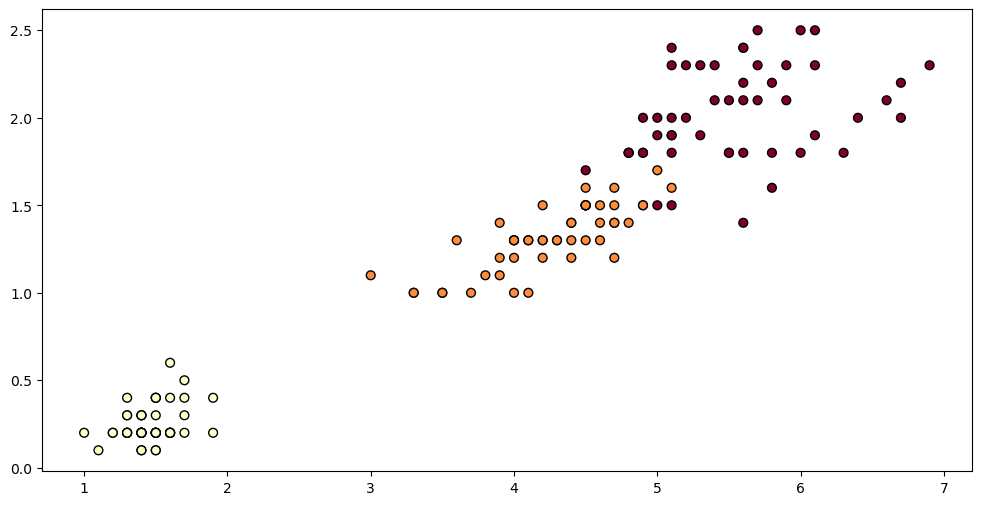

In [4]:
# View data
plt.figure(figsize = (12,6))
plt.scatter(X[:,2], X[:,3], c=y, cmap='YlOrRd', edgecolor='k', s=40)
plt.show()

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [6]:
# Scale 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## From scratch

In [7]:
# Import KNN classifier from scratch 
from my_KNN import my_KNNClassifier, accuracy, confusionMatrix

In [8]:
# Create the model
clf = my_KNNClassifier()

# Fit
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Evaluate
acc = accuracy(predictions, y_test)
print("\n Accuracy: %.2f%%" % (acc*100))

# Confusion matrix
confusionMatrix(y_test, predictions)


 Accuracy: 100.00%


Predicted,0,1,2,All
Actual,,,,
0,9,0,0,9
1,0,13,0,13
2,0,0,8,8
All,9,13,8,30


## Sklearn

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [10]:
# Create the model
modelo = KNeighborsClassifier()

# Fit
modelo.fit(X_train, y_train)

# Make prdictions
y_pred = modelo.predict(X_test)

# Evalate
modelo.score(X_train, y_train)
c_matrix = confusion_matrix(y_test, predictions, )
r2 = r2_score(y_test, y_pred)

# Print results
print("\n Accuracy: %.2f%%" % (r2*100))
print("\nConfusion Matrix\n",c_matrix)


 Accuracy: 100.00%

Confusion Matrix
 [[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


___

# <center> KNN Regressor

## Data

In [11]:
# Load data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [12]:
# Separating train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
# Scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## From Scratch

In [14]:
# Import knn regressor from scratch
from my_KNN import my_KNNRegressor, r2

In [15]:
# Create the and
knn = my_KNNRegressor(distance = 'manhatan')

# Fit
knn.fit(X_train, y_train)

# make predictions
predictions = knn.predict(X_test)

# Evaluate with r2
r2 = r2(y_test, predictions)
print("\n r2: %.2f%%" % (r2*100))


 r2: 76.95%


## Sklearn

In [16]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [17]:
# Create the model
modelo = KNeighborsRegressor()

# Fit and evaluate
modelo.fit(X_train, y_train)
modelo.score(X_train, y_train)

# Make predictions
y_pred = modelo.predict(X_test)

# Extract and print r2 score
r2 = r2_score(y_test, y_pred)
print("\n r2: %.2f%%" % (r2*100))


 r2: 72.87%


___